# Kelompok 3 C2 

1. 2101310	AKMAL ZULKIFLI
2. 2205297	NABILLA ASSYFA RAMADHANI
3. 2205410	RADITYA ADHA RAHMAN
4. 2106330	WILDAN MAULI DAROJAT
5. 2201017	ILHAM AKBAR

Data NPL untuk mendeteksi nasabah yang kreditnya akan macet. Field yang akan diprediksi adalah "flag_kredit_macet".

#### IMPORT LIBRARY

In [1]:
# display
%matplotlib inline
# numerik
import numpy as np
# analisis
import pandas as pd
# plot
import matplotlib.pyplot as plt
# visualisasi
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### READ FILE

In [2]:
data=pd.read_csv("npl_train.txt")
data.head(3)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.00376,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.00000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.00000,0.000000,0.040518,0.047703,0.249389,0.267853


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

### Menghapus Kode Cabang
kode_cabang dan X dihapus karena tidak memiliki kaitan dengan hasil akhir.

In [4]:
data = data.drop(["kode_cabang","X"], axis=1)

In [5]:
data["flag_kredit_macet"].value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

### SPLIT DATA

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data_train, data_test=train_test_split(data,test_size=0.4,random_state=1)

In [8]:
data_train.head(5)

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
10502,4,24962677,23000000.0,22575840.0,0.0,2957908.0,25136225.0,0.0,8.62,7.88,...,0,13.00,2957908.0,6284056.0,1.090,0.129000,0.0840,0.0537,1.25000,1.20000
14010,2,7474329,7000000.0,2981653.0,0.0,0.0,2133750.0,60.9,2.07,83.90,...,0,9.58,0.0,1066875.0,0.305,0.000000,0.5750,0.6010,1.06000,0.48500
5089,3,596113,44000000.0,530033.0,0.0,0.0,0.0,0.0,0.00,18.10,...,1,6.92,0.0,0.0,0.000,0.000000,0.0000,0.0000,0.00611,0.00716
7683,3,4851906,10000000.0,4748881.0,0.0,1130000.0,4746073.0,23.1,0.00,30.50,...,0,5.83,1130000.0,1582024.0,0.475,0.113000,0.0569,1.1800,1.35000,9.73000
5692,2,76966,80000000.0,78000.0,0.0,196.0,0.0,0.0,0.00,25.20,...,1,1.50,196.0,0.0,0.000,0.000002,0.0013,0.0023,0.00241,0.00241


In [9]:
data_test=data_test.drop("flag_kredit_macet", 1)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9295 entries, 10502 to 13349
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         9295 non-null   int64  
 1   outstanding                          9295 non-null   int64  
 2   limit_kredit                         9295 non-null   float64
 3   tagihan                              9295 non-null   float64
 4   total_pemakaian_tunai                9295 non-null   float64
 5   total_pemakaian_retail               9295 non-null   float64
 6   sisa_tagihan_tidak_terbayar          9295 non-null   float64
 7   rasio_pembayaran                     9295 non-null   float64
 8   persentasi_overlimit                 9295 non-null   float64
 9   rasio_pembayaran_3bulan              9295 non-null   float64
 10  rasio_pembayaran_6bulan              9295 non-null   float64
 11  skor_delikuensi          

### Kelas Target

In [11]:
X=data_train.drop("flag_kredit_macet",1)

In [12]:
X.head(5)

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
10502,4,24962677,23000000.0,22575840.0,0.0,2957908.0,25136225.0,0.0,8.62,7.88,...,0,13.00,2957908.0,6284056.0,1.090,0.129000,0.0840,0.0537,1.25000,1.20000
14010,2,7474329,7000000.0,2981653.0,0.0,0.0,2133750.0,60.9,2.07,83.90,...,0,9.58,0.0,1066875.0,0.305,0.000000,0.5750,0.6010,1.06000,0.48500
5089,3,596113,44000000.0,530033.0,0.0,0.0,0.0,0.0,0.00,18.10,...,0,6.92,0.0,0.0,0.000,0.000000,0.0000,0.0000,0.00611,0.00716
7683,3,4851906,10000000.0,4748881.0,0.0,1130000.0,4746073.0,23.1,0.00,30.50,...,0,5.83,1130000.0,1582024.0,0.475,0.113000,0.0569,1.1800,1.35000,9.73000
5692,2,76966,80000000.0,78000.0,0.0,196.0,0.0,0.0,0.00,25.20,...,0,1.50,196.0,0.0,0.000,0.000002,0.0013,0.0023,0.00241,0.00241


In [13]:
y=data_train[["flag_kredit_macet"]]

In [14]:
y.head(5)

,flag_kredit_macet
10502,0
14010,0
5089,1
7683,0
5692,1


### DATA IMBALANCE

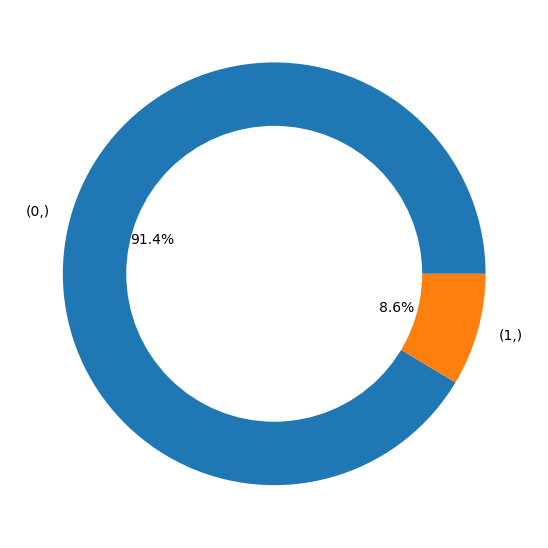

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [16]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
X,y=over.fit_resample(X,y)

In [17]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

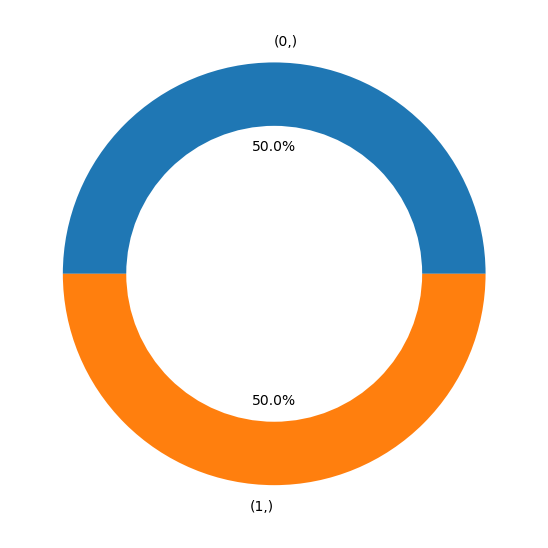

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

### METODE NAIVE BAYES

In [19]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
Y_pred = nb_model.predict(x_cv)
acc = accuracy_score(y_cv, Y_pred)*100

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))

Akurasi 54.81023830538394
              precision    recall  f1-score   support

           0       0.82      0.11      0.19      1680
           1       0.53      0.98      0.69      1719

    accuracy                           0.55      3399
   macro avg       0.68      0.54      0.44      3399
weighted avg       0.67      0.55      0.44      3399



### METODE DECISION TREE

In [20]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
print("akurasi:",score_tree)
print(classification_report(y_cv, pred_cv_tree))

akurasi: 86.70197116799059
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1680
           1       0.86      0.88      0.87      1719

    accuracy                           0.87      3399
   macro avg       0.87      0.87      0.87      3399
weighted avg       0.87      0.87      0.87      3399



### METODE RANDOM FOREST

In [21]:

forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

akurasi: 89.14386584289497
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1680
           1       0.87      0.92      0.90      1719

    accuracy                           0.89      3399
   macro avg       0.89      0.89      0.89      3399
weighted avg       0.89      0.89      0.89      3399



### METODE XGBoost

In [22]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=7)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  93.14504265960576
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1680
           1       0.92      0.95      0.93      1719

    accuracy                           0.93      3399
   macro avg       0.93      0.93      0.93      3399
weighted avg       0.93      0.93      0.93      3399



In [23]:
pred_xgb_test=xgb_model.predict(data_test)
pred_xgb_test

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
df_pred_result=data_test
df_pred_result["Prediksi_kredit"]=pred_xgb_test

In [25]:
df_pred_result

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,Prediksi_kredit
3576,2,8096704,8000000.0,4073734.0,0.0,1901025.0,5213854.0,65.5,1.24,37.90,...,2.750,1901025.0,2606927.0,0.652,0.2380,0.19200,0.0436,0.972000,0.62800,0
8564,2,684568,8000000.0,47263.0,0.0,538655.0,0.0,100.0,0.00,100.00,...,3.670,538655.0,0.0,0.000,0.0673,0.02750,0.1350,0.117000,0.15800,0
13670,3,3617686,11000000.0,1933276.0,0.0,586000.0,3155317.0,100.0,0.00,100.00,...,5.750,586000.0,1051772.0,0.287,0.0533,0.12800,0.0864,0.359000,0.26700,0
13243,2,3110979,3000000.0,3007042.0,0.0,100000.0,3097253.0,10.1,3.84,12.40,...,0.917,100000.0,1548627.0,1.030,0.0333,0.00293,0.0000,0.971000,1.01000,0
804,2,139723,4000000.0,148961.0,0.0,0.0,0.0,0.0,0.00,39.46,...,11.250,0.0,0.0,0.000,0.0000,0.00000,0.0000,0.065723,0.34326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,4,4732242,4000000.0,4505282.0,0.0,165000.0,4766229.0,46.7,18.90,17.10,...,2.750,165000.0,1191557.0,1.190,0.0413,0.09850,0.3670,1.090000,1.04000,0
5691,2,2294072,4000000.0,1115000.0,0.0,848587.0,1925453.0,81.7,0.00,98.80,...,2.830,848587.0,962727.0,0.481,0.2120,0.16600,0.2200,0.492000,0.67800,0
5995,6,22629584,18000000.0,20208542.0,0.0,3927461.0,22643270.0,40.1,11.90,58.00,...,14.800,3927461.0,3773878.0,1.260,0.2180,0.21000,0.7290,1.170000,1.09000,0
12277,2,8153311,8000000.0,3644008.0,0.0,946400.0,7961240.0,0.0,1.24,97.00,...,2.670,946400.0,3980620.0,0.995,0.1180,0.35400,0.3510,0.994000,0.46100,0


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_xgb,y_cv)

array([[1528,   81],
       [ 152, 1638]], dtype=int64)